In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import os
from statistics import mean,median,stdev
from scipy import stats
from scipy.io.wavfile import read
from scipy import signal

from datetime import datetime

In [2]:
os.chdir('/Users/cogmech/Documents/Buckeye_AF/Data/audio')

w1 = read('s0101a.wav')
w1

(16000, array([  0,   0,   0, ..., -14, -17, -30], dtype=int16))

In [3]:
len(w1[1])

9969854

In [6]:
files = [item for item in os.listdir(os.getcwd())]
files

['s0101a.wav',
 's0101b.wav',
 's0102a.wav',
 's0102b.wav',
 's0103a.wav',
 's0201a.wav',
 's0201b.wav',
 's0202a.wav',
 's0202b.wav',
 's0203a.wav',
 's0203b.wav',
 's0204a.wav',
 's0204b.wav',
 's0205a.wav',
 's0205b.wav',
 's0206a.wav',
 's0301a.wav',
 's0301b.wav',
 's0302a.wav',
 's0302b.wav',
 's0303a.wav',
 's0303b.wav',
 's0304a.wav',
 's0304b.wav',
 's0305a.wav',
 's0305b.wav',
 's0306a.wav',
 's0401a.wav',
 's0401b.wav',
 's0402a.wav',
 's0402b.wav',
 's0403a.wav',
 's0403b.wav',
 's0404a.wav',
 's0501a.wav',
 's0501b.wav',
 's0502a.wav',
 's0502b.wav',
 's0503a.wav',
 's0503b.wav',
 's0504a.wav',
 's0601a.wav',
 's0601b.wav',
 's0602a.wav',
 's0602b.wav',
 's0603a.wav',
 's0701a.wav',
 's0701b.wav',
 's0702a.wav',
 's0702b.wav',
 's0703a.wav',
 's0703b.wav',
 's0704a.wav',
 's0801a.wav',
 's0801b.wav',
 's0802a.wav',
 's0802b.wav',
 's0803a.wav',
 's0803b.wav',
 's0804a.wav',
 's0901a.wav',
 's0901b.wav',
 's0902a.wav',
 's0902b.wav',
 's0903a.wav',
 's0903b.wav',
 's1001a.w

In [7]:
#read wav files in loop, resample and save resampled files into array list 
audio = []
new_sr = 5000

for i in range(len(files)):
    dateTimeObj = datetime.now()
    #print(i,dateTimeObj)
    wf = read(files[i])
    t = len(wf[1])/wf[0] #num samples/sample rate
    
    w = signal.resample(wf[1], int(new_sr*t))
    audio.append(w)
    

In [8]:
files = [item[0:3] for item in os.listdir(os.getcwd())]
indexes = [i for i in range(len(files)-1) if files[i] != files[i+1] ]
indexes.insert(0,0)
indexes.append(len(files))
indexes


[0,
 4,
 15,
 26,
 33,
 40,
 45,
 52,
 59,
 65,
 71,
 79,
 86,
 93,
 99,
 104,
 111,
 117,
 124,
 132,
 139,
 143,
 149,
 155,
 161,
 167,
 173,
 180,
 185,
 191,
 196,
 201,
 205,
 210,
 216,
 222,
 228,
 234,
 239,
 245,
 253]

In [9]:
audio_parts = []
for i in range(len(indexes)-1):
    
    if i == 0:
        part = audio[indexes[i]:indexes[i+1]+1]
    elif i > 0:
        part = audio[indexes[i]+1:indexes[i+1]+1] 
    #print(i)
        
    audio_parts.append(np.concatenate(part))

In [10]:
audio_partchunks = []

chunk_samples = 240*new_sr

for i in range(len(audio_parts)):
    current = audio_parts[i]
    chunks = []
    for j in range(len(current)):
        if j > 0 and j % chunk_samples == 0:
            chunk = current[j-chunk_samples:j]
            chunks.append(chunk)
            
    audio_partchunks.append(chunks)
        
len(audio_partchunks)  

40

In [11]:
chunk_samples = 240*new_sr

chunks = []
for i in range(len(audio_parts)):
    current = audio_parts[i]
    
    for j in range(len(current)):
        if j > 0 and j % chunk_samples == 0:
            chunk = current[j-chunk_samples:j]
            chunks.append(chunk)

In [18]:
#for i in range(len(audio_partchunks)):
#    print(len(audio_partchunks[i]))
    
#need to delete audio_partchunks[11][9]

#audio_partchunks[31] = audio_partchunks[31][0:9]
#len(audio_partchunks[11])
chunks = []
for i in range(len(audio_partchunks)):
    for j in range(len(audio_partchunks[i])):
        chunks.append(audio_partchunks[i][j])

len(chunks)
    

543

In [17]:
for i in range(len(audio_partchunks)):
    print(len(audio_partchunks[i]))

11
18
18
15
15
10
15
15
14
12
17
15
15
14
12
17
10
15
19
16
9
14
14
14
14
13
15
11
14
12
10
9
12
14
12
12
13
11
13
14


In [25]:
len(chunks[1])

1200000

In [27]:
import scipy.io as sio


#label = 'm1'

chunks_dict = {'m1':chunks[0:300],'m2':chunks[300:543]}
#chunks_dict = {header[i]:chunks[i] for i in range(len(header))}

sio.savemat('audio_chunks.mat',chunks_dict)


In [ ]:
#chunks_dict


In [144]:
def allanfactor(fin,numint):
    af = np.zeros(numint)    #very small intervals lead to FF = 1, large intervals can lead to FF > 1
    mean = np.sum(fin)/numint
    
    #get length of each interval
    inte = int(np.floor(len(fin)/numint))
    #get variance
    tot = 0
    for i in range(numint-1):
        #(i-1)
        tot = tot + np.sum(fin[(i*inte):(i+1)*inte])  -  np.sum(fin[((i-1)*inte) + 1:(i*inte)] )**2
        af[i] = (tot/i)/(2*mean)
    
    allan = af[numint-1]
    return allan
                     

In [145]:
def af_analysis(fin,start,powers,binwidth):
    base = 2
    allan1 = np.zeros(len(range(start,powers+1)))
    count = 0
    abcissa = np.array([])
    actual = np.array([])
    abcis = np.array([])
    for i in range(start,powers+1):
        abcissa = np.append(abcissa,base**i)
        allan1[count] = allanfactor(fin, base**i)
        count = count + 1
        
    length = len(abcissa)-1
    for i in range(length):
        actual = np.append(actual,allan1[length - i])
        abcis = np.append(abcis,(len(fin)*binwidth)/abcissa[length - i])
        
    return actual,abcis

In [146]:
def run_af(w, samp_rate):
    minpd = 2.5 #minimal distance between peaks, in ms
    nmin = 4 #number of minutes per AF analysis standard (4)
    ppeak = 0.005 #proportion of Hilbert envelope peaks extracted
    emin = 4 #1/2^emin number of largest window partitions standard (4)
    emax = 14 #1/2^emax number of smallest window partitions
    nbin = 11 #number of log bins for IEI distribution and 1/f analysis   
    sr = samp_rate
    
    ws = (sr*60)*nmin #window size is set by the total number of minutes per AF analysis in secods times sample rate
    plen = math.floor(sr/1000*minpd) 
    N = math.ceil(len(w)/ws)
    
    for i in range(N):
        if i == 0:
            cw = w[i*ws:ws]
        else:
            cw = w[i*ws:ws*(i+1)]
            
        print('compute envelope',i, 'of', N,'...')
        env = np.abs(signal.hilbert(cw))
        
        print('find peaks...')
        n = ws-plen+1
        
        for j in range(n):
            y = max(env[j:j+plen])
            idx = np.argmax(env[j:j+plen])
            env[j:j+plen] = 0
            env[j+idx] = y
            
        envs = np.sort(env[env>0])[::-1]
        cmax = envs[math.floor(ws*ppeak)]
        pp = env>cmax
        pp.astype(int)
        #ppidx = np.argwhere(pp==True)##optional for iei measurements
        #iei = ppidx[2:end]-ppidx[1:end-1]
        
        print('run Allan Factors...')
        my_ay = np.array([])
        my_ax = np.array([])
        output = af_analysis(pp,emin,emax,1/sr) 
        my_ay = np.append(my_ay,output[1])
        my_ax = np.append(my_ax,output[0])
        print(output)
        
    if N > 1:
        my_ax = np.mean(my_ax) 
        my_ay = np.mean(my_ay)
        
    return my_ax,my_ay
    

In [147]:
ax,ay = run_af(audio_partchunks[0][0],new_sr)

compute envelope 0 of 1 ...
find peaks...
run Allan Factors...


C:\Users\cogmech\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
C:\Users\cogmech\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


IndexError: index 11 is out of bounds for axis 0 with size 11

C:\Users\cogmech\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


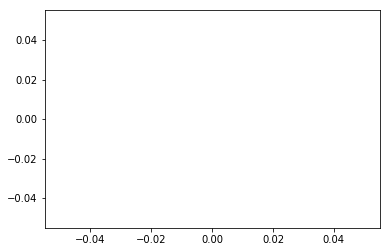

In [143]:
plt.plot(np.log(range(len(ax))),np.log(ay))